In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
df=pd.read_csv(r"C:\Users\SACHINKUMAR\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
dup_df=df[['month'	,'town',	'flat_type'	,'block','street_name'	,'storey_range','flat_model']]
for i in dup_df.columns:
  orc=LabelEncoder()
  df[i]=orc.fit_transform(df[[i]])
x=df[['month'	,'town',	'flat_type'	,'block'	,'street_name'	,'storey_range','floor_area_sqm',	'flat_model',	'lease_commence_date']]
y=df['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

c:\amazon\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\amazon\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\amazon\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\amazon\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

In [11]:
p75=df['resale_price'].quantile(0.75)
p25=df['resale_price'].quantile(0.25)
iqr=p75-p25
upper=p75+1.5*iqr
lower=p25-1.5*iqr

In [12]:
new_df=df[(df['resale_price']>lower) & (df['resale_price'] < upper)]
x1=new_df[['month'	,'town',	'flat_type'	,'block'	,'street_name'	,'storey_range','floor_area_sqm',	'flat_model',	'lease_commence_date']]
y1=new_df['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [13]:
mo1=sm.OLS(y,x)
mo1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           resale_price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          5.908e+05
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                        0.00
Time:                        12:19:33   Log-Likelihood:                     -3.5553e+06
No. Observations:              287196   AIC:                                  7.111e+06
Df Residuals:                  287187   BIC:                                  7.111e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
month                1590.0074      3.389    469.102      0.000    1583.364    1596.651
town                 -641.6461     20.571    -31.192      0.000    -681.964    -601.328
flat_type            4.378e+04    389.537    112.397      0.000     4.3e+04    4.45e+04
block                  -2.9349      0.369     -7.955      0.000      -3.658      -2.212
street_name            12.0219      1.320      9.111      0.000       9.436      14.608
storey_range         4152.7278     77.847     53.345      0.000    4000.149    4305.306
floor_area_sqm       1946.9046     14.134    137.741      0.000    1919.201    1974.608
flat_model          -1301.0939     38.839    -33.499      0.000   -1377.218   -1224.970
lease_commence_date  -102.7885      0.324   -317.227      0.000    -103.424    -102.153
==============================================================================
Omnibus:                    30853.306   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62076.061
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                       4.803   Cond. No.                     7.38e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
singapore_model=DecisionTreeRegressor().fit(x_train,y_train)
singapore_model.predict([[0.0,0.0,0.0,269.0,4.0,3.0,31.0,2.0,1977]])

c:\amazon\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([8500.])

In [15]:
import pickle
pickle.dump(singapore_model, open('singapore_model.pkl','wb'))

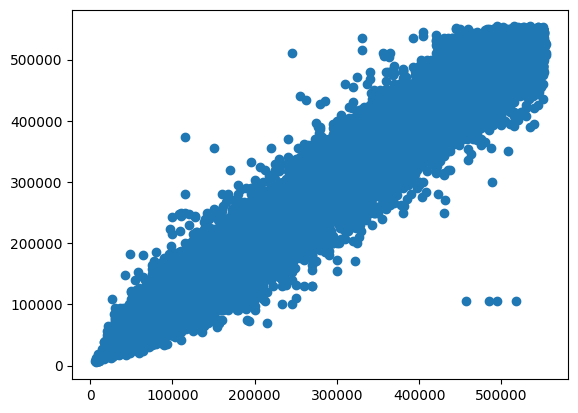

In [16]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,singapore_model.predict(x_test))

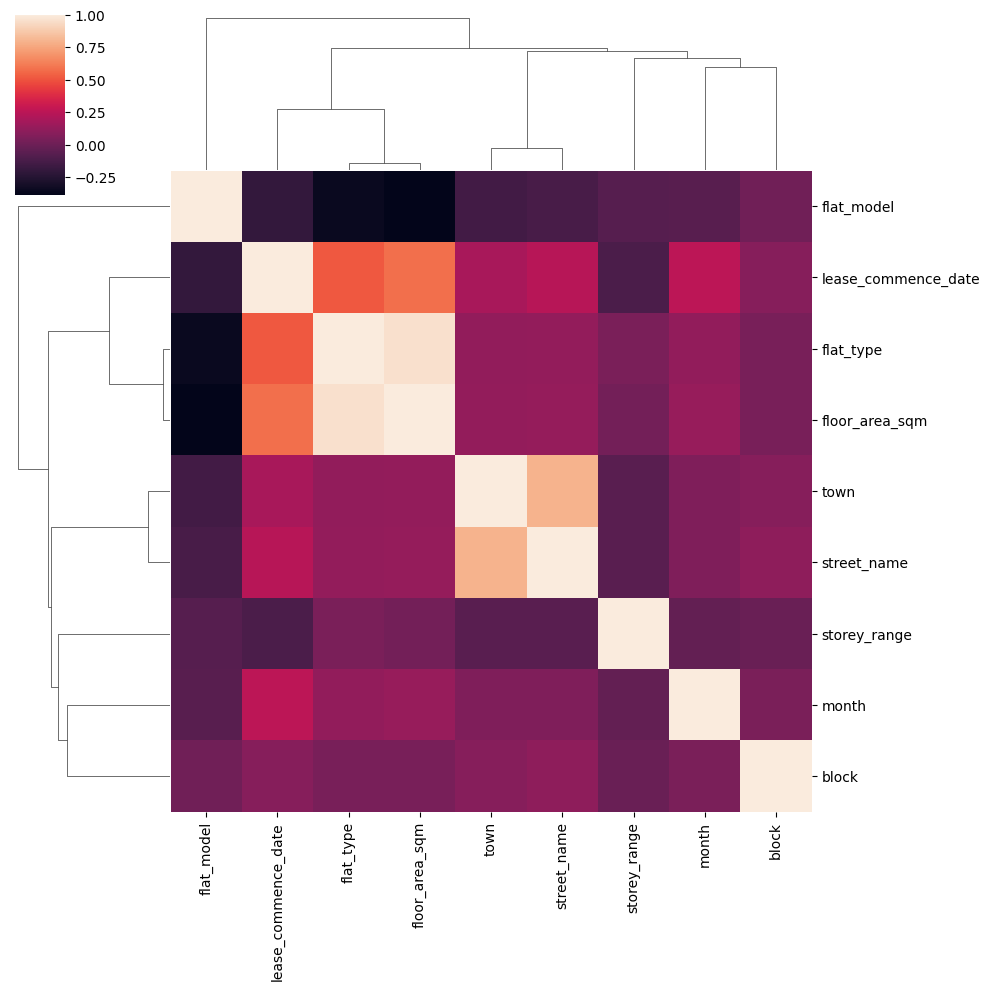

In [17]:
import seaborn as sns 
sns.clustermap(x.corr())

In [19]:
import numpy as np
error=mean_squared_error(y_test,singapore_model.predict(x_test))
print(np.sqrt(error))
print(error)

23276.097486693794
541776714.2100731


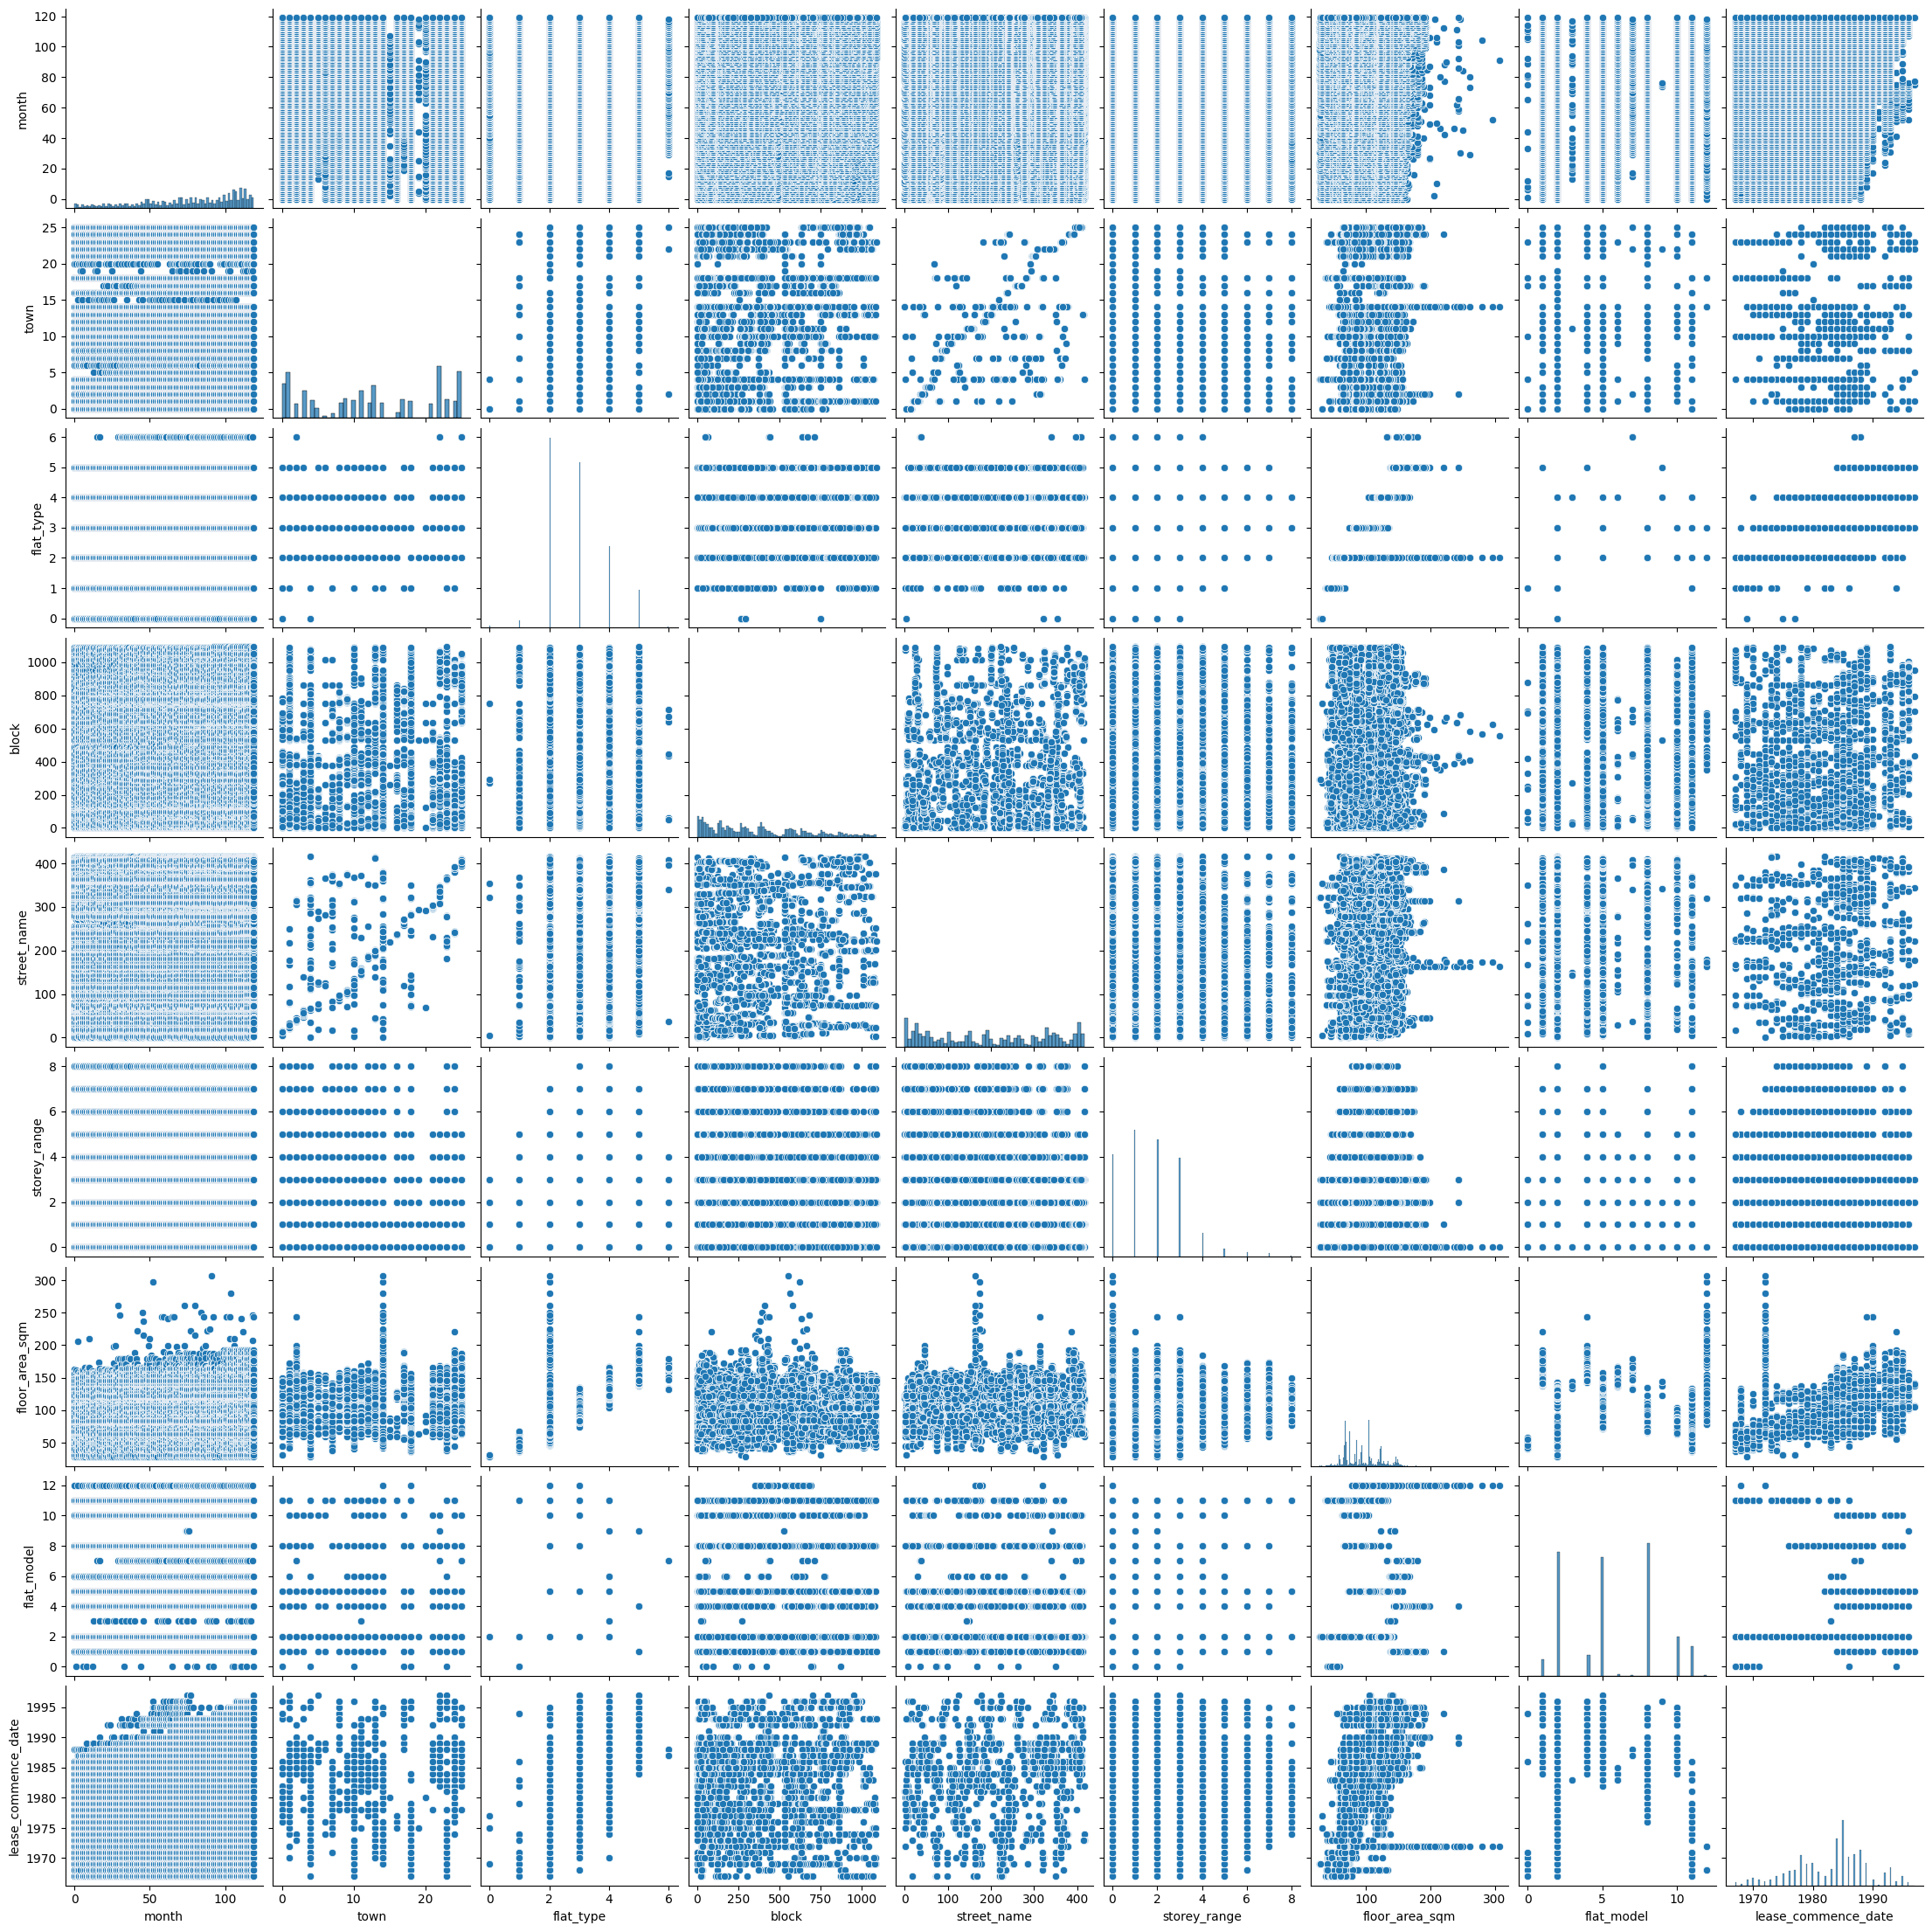

In [21]:
sns.pairplot(x)